In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [14]:
mangaid = '1-43214'
nsa_z = 0.117997
plateifu = '8135-1902'

In [15]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8135-1902-LOGCUBE.fits.gz')

In [16]:
# data.info()

In [17]:
np.round((data[0].header)['OBJRA'],7), np.round((data[0].header)['OBJDEC'],7)

(114.0963833, 39.4382798)

In [18]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

In [19]:
# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [20]:
# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [21]:
do_not_use = (mask & 2**10) != 0 
# do_not_use

In [22]:
# retrieve the wave values 
wave = data['WAVE'].data

In [23]:
flux_header = data['FLUX'].header
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

In [24]:
# do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = nsa_z
ind_wave = np.where((wave > 5575) & (wave < 5625))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
dim = [0, len(flux), 0, len(flux)]

AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755) 2


Text(0.5, 0.98, 'MaNGA ID = 1-43214')

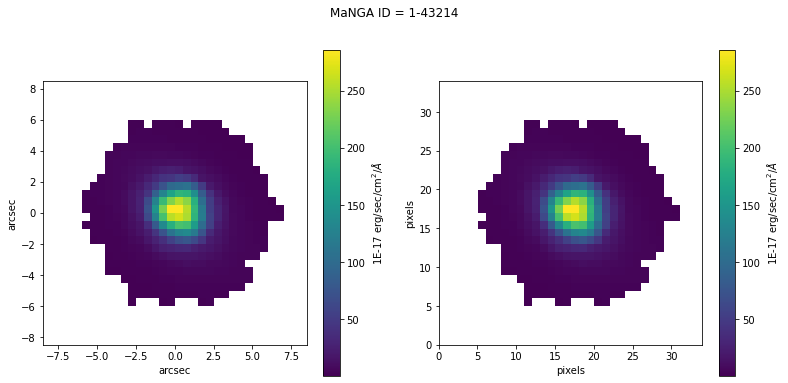

In [25]:
fig, ax = plt.subplots(1,2, figsize = (13,6))

print(fig.get_axes()[0], fig.get_axes()[1], len(fig.get_axes()))

im1 = ax[0].imshow(im, extent = extent, cmap = cm.viridis, origin = 'lower', interpolation = 'none');
im2 = ax[1].imshow(im, extent = dim, cmap = cm.viridis, origin = 'lower', interpolation = 'none');
fig.colorbar(im1, label='1E-17 erg/sec/'+r'cm$^2$/'+r'$\AA$', ax = ax[0]);
fig.colorbar(im2, label='1E-17 erg/sec/'+r'cm$^2$/'+r'$\AA$', ax = ax[1]);

ax[0].set_xlabel('arcsec')
ax[0].set_ylabel('arcsec')

ax[1].set_xlabel('pixels')
ax[1].set_ylabel('pixels')

plt.suptitle('MaNGA ID = ' + mangaid)

# plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, origin='lower', interpolation='none')
# plt.colorbar(label=flux_header['BUNIT'])
# plt.xlabel('arcsec')
# plt.ylabel('arcsec')
# plt.savefig('Images/3d_SideBySide', bbox_inches = 'tight')

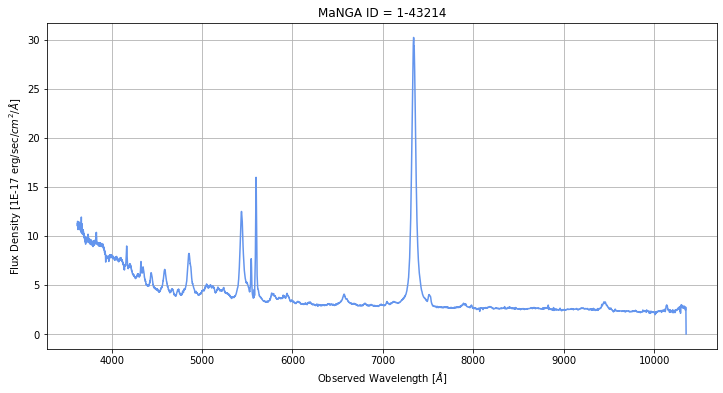

In [26]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(wave, flux[x_center, y_center], color = 'cornflowerblue')
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]');
# plt.savefig('Images/Central_Spectrum.png', bbox_inches = 'tight')

In [27]:
# sum flux density values element wise to get total flux density
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [28]:
# check the redhsift
a = 5007 * (1 + nsa_z)

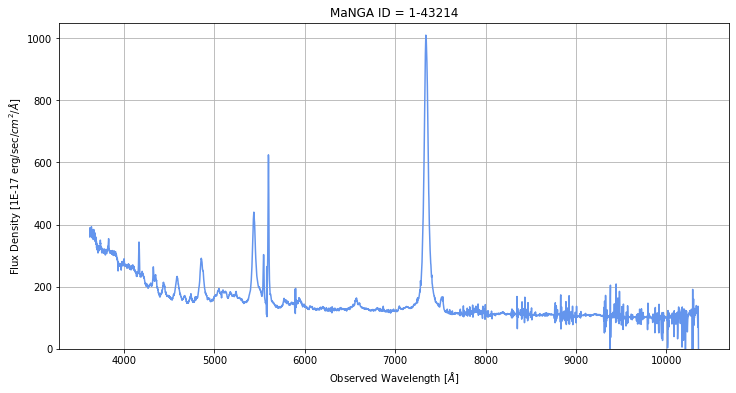

In [29]:
plt.figure(figsize = (12,6))
plt.grid()
plt.ylim(0, 1050)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue')
# plt.savefig('Images/WholeFlux_{}'.format(mangaid), bbox_inches = 'tight')

In [30]:
# plt.figure(figsize = (12,5))
# plt.grid()
# plt.ylim(0,1050)
# plt.xlim(4900, 5100)
# plt.xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
# plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
# plt.title('MaNGA ID = ' + mangaid)
# plt.plot((wave/(1+nsa_z)), sumflux, color = 'hotpink', linewidth = 3)
# plt.axvline(5007, color = 'blue', label = '5007 '+ r'[$\AA$]')
# plt.axvline(4990)
# plt.legend()
# # plt.savefig('Images/RestFluxZoomed_{}'.format(mangaid), bbox_inches = 'tight')
# # plt.savefig('Images/WholeFlux_RestFrame_{}'.format(mangaid), bbox_inches = 'tight')

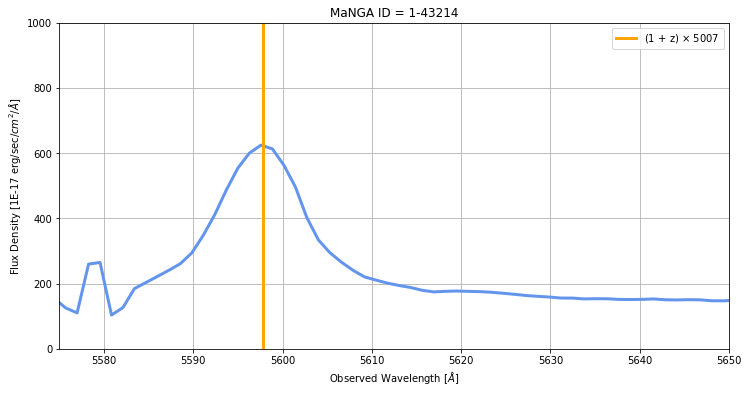

In [31]:
start = 5575
end = 5650
# start = 5500
# end = 5700
height = 1000
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'orange', label = r'(1 + z) $\times$ 5007')
plt.legend()
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

In [32]:
# select peak region
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
yaxis = yaxis[6:32]

print(yaxis)
print(len(yaxis))

# for i in yaxis:
#     print(wave[i])

# 1912
# sumflux[1912]

[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905]
26


In [33]:
index = 0

In [34]:
flux_compare = [] 
ivar_compare = []
mask_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())
    mask_compare.append(do_not_use[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)
mask_compare = np.array(mask_compare)

len(flux_compare[0]), len(ivar_compare), len(mask_compare[0])

(1156, 26, 1156)

In [35]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        flux_compare_masked = flux_compare[i] * ~mask_compare[i]
        if flux_compare[i][j] != flux_compare_masked[j]:
            print('something')
        # To mask flux_compare by multiplying to the whole mask array. So use i only.
        
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        # Have to mask flux compare -- but mask before or after comparing with sigma ? 
        # My guess = mask first.
        
        if flux_compare_masked[j] < (3 * sigma):
            
            result.append(0)
        else:
            result.append(flux_compare_masked[j])
    sumresult.append(np.sum(result))
    result = []
    
    #True True .... True True

In [36]:
result_unmasked = []
sumresult_unmasked = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        
#         flux_compare_masked = flux_compare[i] * ~mask_compare[i]
        # To mask flux_compare by multiplying to the whole mask array. So use i only.
        
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        # Have to mask flux compare -- but mask before or after comparing with sigma ? 
        # My guess = mask first.
        
        if flux_compare[i][j] < (3 * sigma):
            
            result_unmasked.append(0)
        else:
            result_unmasked.append(flux_compare[i][j])
    sumresult_unmasked.append(np.sum(result_unmasked))
    result_unmasked = []

In [23]:
sumresult[index]

182.81499693356454

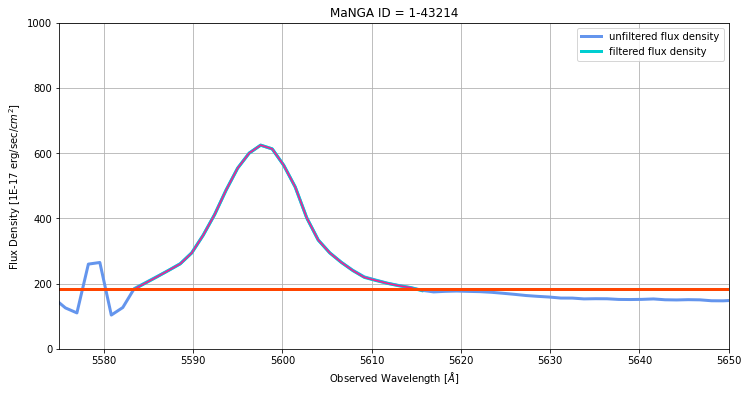

In [37]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, label = 
        'filtered flux density')
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult_unmasked, color = 'deeppink', linewidth = 1.5)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
plt.legend()
# plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

#### Fix mask for the code below also -- but later; lazy to type now

and believe it or not, whenever I come back to it, I'll forget what I need to write and will get a headache from it =.=

In [24]:
flux_compare_display = [] 
ivar_compare_display = []

for i in range(1815,1971):
    flux_compare_display.append(flux[:,:,i].flatten())
    ivar_compare_display.append(ivar[:,:,i].flatten())

flux_compare_display = np.array(flux_compare_display)
ivar_compare_display = np.array(ivar_compare_display)

len(flux_compare_display[0]), len(ivar_compare_display)

(1156, 156)

In [25]:
result_display = []
sumresult_display = []

for i in range(len(flux_compare_display)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare_display[i][j]) if ivar_compare_display[i][j] != 0 else 0
        
        if flux_compare_display[i][j] < (3 * sigma):
            result_display.append(0)
        else:
            result_display.append(flux_compare_display[i][j])
    sumresult_display.append(np.sum(result_display))
    result_display = []

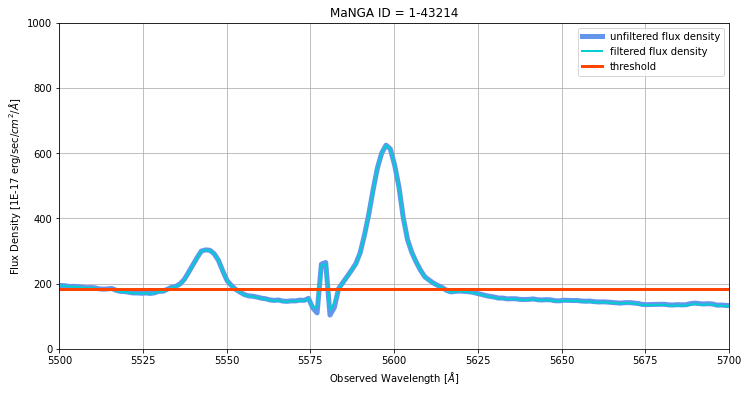

In [26]:
plt.figure(figsize = (12,6))
plt.grid()
# plt.xlim(start, end)
plt.xlim(5500,5700)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 5, label = 'unfiltered flux density') 
# plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 2,
#          label = 'filtered flux density')
plt.plot(wave[1815 : 1971], sumresult_display, color = 'darkturquoise', linewidth = 2,
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')
# plt.axvline(wave[yaxis[0]], color = 'lightgreen', linewidth = 3, label = 'lower bound')
# plt.axvline(wave[yaxis[-1]], color = 'lightgreen', linewidth = 3, label = 'upper bound')

plt.legend()

# plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')
# plt.savefig('Images/withThreshold_Zoomed{}'.format(mangaid), bbox_inches = 'tight')
# plt.savefig('Images/withThreshold_{}'.format(mangaid), bbox_inches = 'tight')

In [27]:
line1 = 5614
line2 = 5616
height1 = 175
height2 = 195

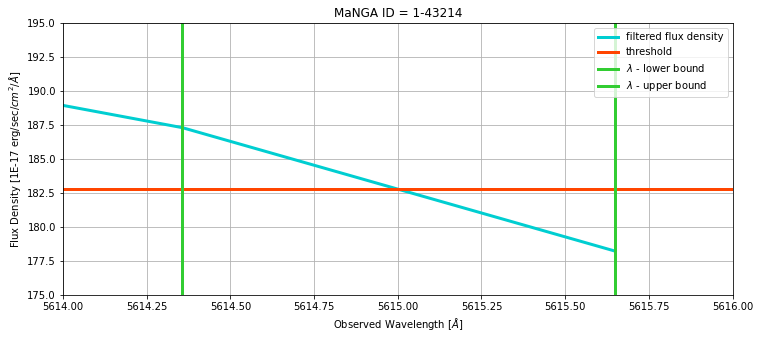

In [28]:
plt.figure(figsize = (12,5))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [29]:
index2 = np.where(yaxis == yaxis[-2])[0][0]
print(index2)
sumresult[index2]

24


187.29871786944568

In [30]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis[-2]], wave[yaxis[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5614.356681329818, 5615.649583575098]
[187.29871786944568, 178.21208829805255]
187.29871786944568


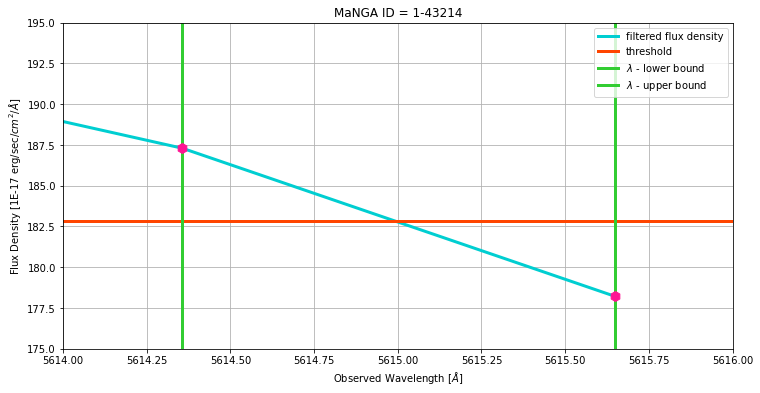

In [31]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [32]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-7.028087084355899

In [33]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

39645.48639689079

In [34]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [35]:
xval = func(sumresult[index], m, c)
xval

182.81499693356454 -7.028087084355899 39645.48639689079


5614.994653068367

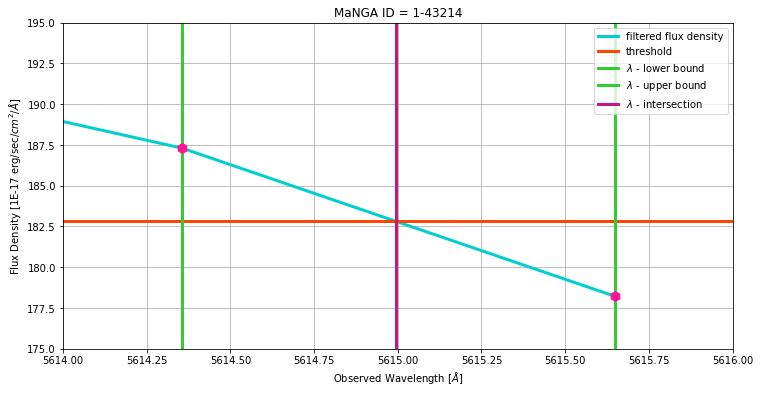

In [36]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [37]:
xcoord = []
ycoord = []

for i in range(yaxis[0], yaxis[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(26, 26, 26)

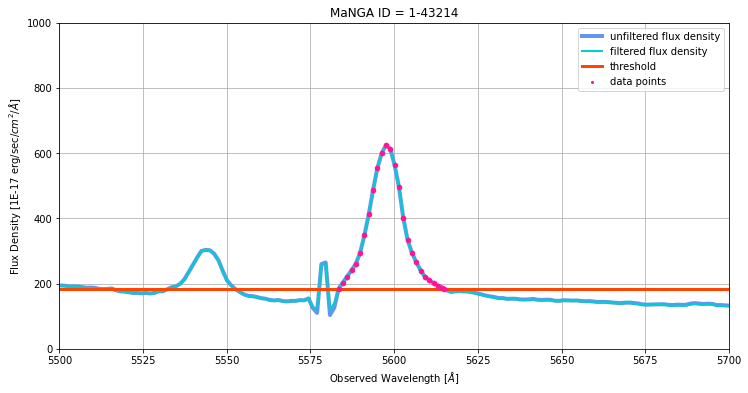

In [38]:
plt.figure(figsize = (12,6))
plt.grid()
# plt.xlim(start-1, end-2)
plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 4, label = 'unfiltered flux density')
# plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 2
#         , label = 'filtered flux density')
plt.plot(wave[1815 : 1971], sumresult_display, color = 'darkturquoise', linewidth = 2,
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord)):
    plt.plot(xcoord[i], ycoord[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [39]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [40]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

11017.060140626734

In [41]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

5773.020237912076

In [42]:
fluxarea = finalarea - subtract
fluxarea

5244.039902714659

In [43]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.117997

### With the subtraction

In [44]:
luminosity_distance = Mpc_to_cm(549.6)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.695889728e+27 cm / 1.895269924657014e+42 erg/s (?)


In [45]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [46]:
print('MaNGA ID =', mangaid)
print('redshift =', nsa_z)
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

MaNGA ID = 1-43214
redshift = 0.117997
M_BH / M_sol = 48077062.63478087
log(luminosity) = 42.27767107100116
log(M_BH / M_sol) = 7.681937925706926
log(luminosity / sol_lum) = 8.692661791098699


### Without the subtraction -- Don't need this bit

In [47]:
luminosity_without_subtract = luminosity_calc(luminosity_distance, finalarea)
print(luminosity_distance, 'cm', '/', luminosity_without_subtract, ('erg/s (?)'))

1.695889728e+27 cm / 3.981720797330015e+42 erg/s (?)


In [48]:
print('M_BH / M_sol =',BH_calc(luminosity_without_subtract))
print('log(luminosity) =',np.log10(luminosity_without_subtract))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_without_subtract)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_without_subtract / sol_luminosity))

M_BH / M_sol = 101003787.205713
log(luminosity) = 42.60007080354922
log(M_BH / M_sol) = 8.004337658254988
log(luminosity / sol_lum) = 9.01506152364676
